In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [4]:
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [5]:
train.isnull().sum()

Applicant_ID          0
form_field1        2529
form_field2        3844
form_field3         355
form_field4         355
form_field5         355
form_field6       13360
form_field7        5163
form_field8       13360
form_field9        8008
form_field10        355
form_field11      31421
form_field12       9895
form_field13       5889
form_field14          0
form_field15      22475
form_field16      13036
form_field17      11151
form_field18      10402
form_field19          4
form_field20        355
form_field21      15854
form_field22      20400
form_field23      28123
form_field24      13297
form_field25       5450
form_field26       7438
form_field27       9299
form_field28        355
form_field29        355
form_field30      25509
form_field31      39408
form_field32       5450
form_field33       1256
form_field34        355
form_field35      23148
form_field36       1995
form_field37       5450
form_field38        355
form_field39       4211
form_field40      43729
form_field41    

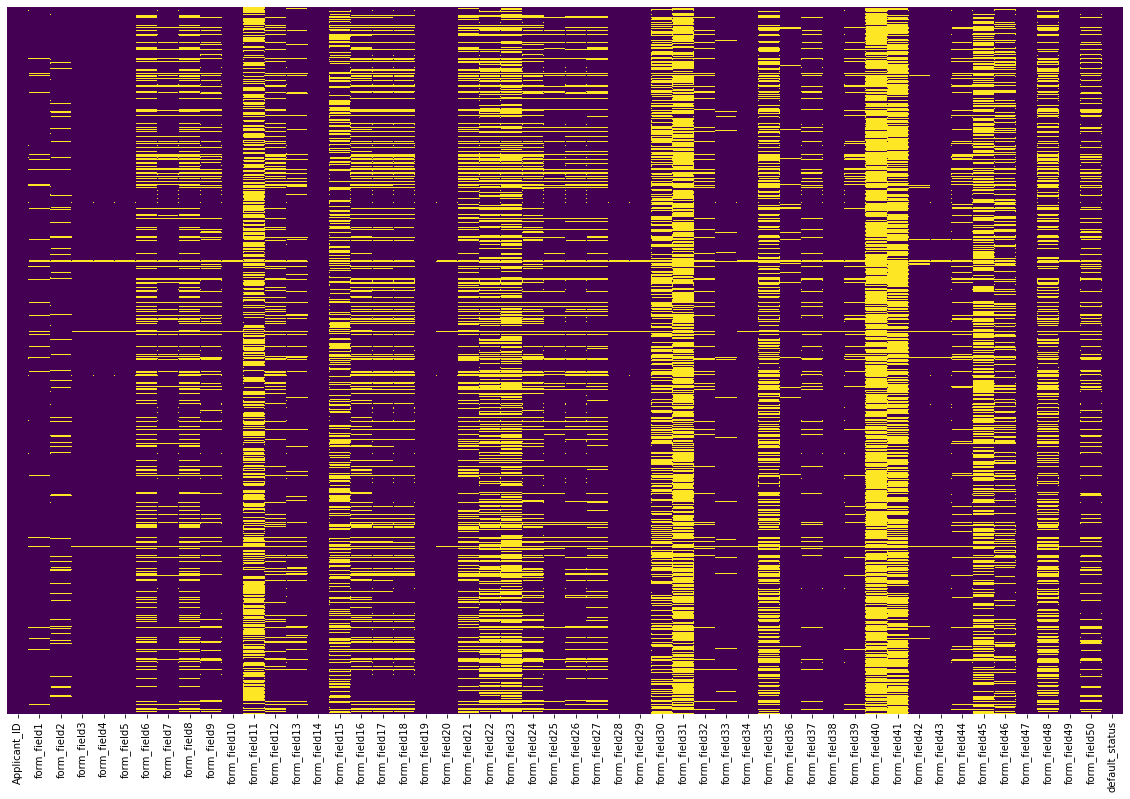

In [6]:
plt.figure(figsize=(20,13))
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [7]:
train['form_field47'] = pd.get_dummies(train['form_field47'], drop_first=True)

In [8]:
train['default_status'] = pd.get_dummies(train['default_status'], drop_first=True)

In [9]:
def fill_with_max(col):
    return col.fillna(np.std(col))
train = train.drop(['Applicant_ID'],axis=1).agg(fill_with_max)

In [10]:
train

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,3436.0,0.28505,1.6560,0.0000,0.000,0.000000e+00,10689720.0,2.520720e+05,4.272776e+06,11333126.0,...,0.392854,2.02,0.711632,0.00000,0.000000,0,1.647734e+06,1.129518,4.433484e-02,0
1,3456.0,0.67400,0.2342,0.0000,0.000,0.000000e+00,898979.0,4.975310e+05,9.073814e+06,2533168.0,...,0.314281,8.08,0.183584,0.29114,0.000000,0,3.498057e+02,1.620483,3.224362e-01,0
2,3276.0,0.53845,3.1510,0.0000,6.282,1.433405e+06,956940.0,3.927309e+06,1.929440e+05,1079864.0,...,0.162965,18.18,0.791136,0.00000,0.000000,0,1.647734e+06,1.513370,1.163967e-02,1
3,3372.0,0.17005,0.5050,0.0000,0.000,1.921660e+05,3044703.0,3.854990e+05,3.986472e+06,3621979.0,...,0.488884,2.02,0.685168,0.29114,0.000000,0,8.994010e+01,0.664452,8.272856e-02,0
4,3370.0,0.77270,1.1010,0.0000,0.000,1.556000e+03,214728.0,2.147280e+05,1.284089e+06,361770.0,...,0.275000,12.12,0.438168,0.00000,0.000000,0,9.788750e+01,1.427891,4.562987e-02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,3740.0,0.01730,0.0000,0.0000,0.000,7.709980e+05,9637475.0,4.047934e+06,1.164199e+07,19910965.0,...,0.000000,9.09,0.730040,0.29114,0.000000,1,5.910489e+02,0.000000,2.415984e-01,0
55996,3360.0,2.01145,0.6252,0.0000,0.000,1.433405e+06,927765.0,3.927309e+06,1.977943e+07,1849306.0,...,0.297913,30.30,0.498208,0.29114,0.000000,1,1.647734e+06,0.000000,5.842340e+06,1
55997,3500.0,0.76640,0.0000,0.0000,0.000,1.186450e+05,3662435.0,3.662435e+06,3.585024e+06,704090.0,...,0.550000,3.03,0.450512,0.00000,0.000000,1,1.252474e+03,2.000000,1.631526e-01,0
55998,3280.0,0.05235,2.0916,2.2212,0.000,1.433405e+06,3458599.0,3.927309e+06,1.155330e+05,3458599.0,...,0.942854,0.00,0.705048,1.00000,0.000000,0,1.647734e+06,0.000000,2.996974e-03,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = train.drop(['default_status'],axis=1)
y = train['default_status']

In [13]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [14]:
from sklearn.model_selection import KFold
n_split = 5
kf = KFold(n_splits=n_split, random_state=42,shuffle=True)

In [15]:
from catboost import CatBoostClassifier

In [16]:
catboost = CatBoostClassifier(iterations=2000,learning_rate=0.01,random_seed=42,l2_leaf_reg=3.5,od_type='Iter',
                              early_stopping_rounds=500,eval_metric='AUC',depth=8,rsm=0.98)

In [17]:
catboost.fit(X,y,eval_set=(X_test,y_test),use_best_model=True)

0:	test: 0.7942665	best: 0.7942665 (0)	total: 482ms	remaining: 16m 3s
1:	test: 0.8066757	best: 0.8066757 (1)	total: 559ms	remaining: 9m 18s
2:	test: 0.8119880	best: 0.8119880 (2)	total: 646ms	remaining: 7m 10s
3:	test: 0.8148236	best: 0.8148236 (3)	total: 799ms	remaining: 6m 38s
4:	test: 0.8144819	best: 0.8148236 (3)	total: 922ms	remaining: 6m 7s
5:	test: 0.8152249	best: 0.8152249 (5)	total: 1.03s	remaining: 5m 43s
6:	test: 0.8168532	best: 0.8168532 (6)	total: 1.15s	remaining: 5m 26s
7:	test: 0.8161732	best: 0.8168532 (6)	total: 1.24s	remaining: 5m 7s
8:	test: 0.8171838	best: 0.8171838 (8)	total: 1.32s	remaining: 4m 52s
9:	test: 0.8172679	best: 0.8172679 (9)	total: 1.41s	remaining: 4m 40s
10:	test: 0.8172462	best: 0.8172679 (9)	total: 1.52s	remaining: 4m 35s
11:	test: 0.8175197	best: 0.8175197 (11)	total: 1.65s	remaining: 4m 33s
12:	test: 0.8175065	best: 0.8175197 (11)	total: 1.75s	remaining: 4m 27s
13:	test: 0.8183946	best: 0.8183946 (13)	total: 1.84s	remaining: 4m 21s
14:	test: 0.818

115:	test: 0.8314517	best: 0.8314517 (115)	total: 11.5s	remaining: 3m 6s
116:	test: 0.8315689	best: 0.8315689 (116)	total: 11.6s	remaining: 3m 6s
117:	test: 0.8316520	best: 0.8316520 (117)	total: 11.7s	remaining: 3m 6s
118:	test: 0.8317601	best: 0.8317601 (118)	total: 11.8s	remaining: 3m 5s
119:	test: 0.8318176	best: 0.8318176 (119)	total: 11.9s	remaining: 3m 5s
120:	test: 0.8318853	best: 0.8318853 (120)	total: 11.9s	remaining: 3m 5s
121:	test: 0.8319520	best: 0.8319520 (121)	total: 12s	remaining: 3m 5s
122:	test: 0.8320524	best: 0.8320524 (122)	total: 12.1s	remaining: 3m 4s
123:	test: 0.8321564	best: 0.8321564 (123)	total: 12.2s	remaining: 3m 4s
124:	test: 0.8322405	best: 0.8322405 (124)	total: 12.3s	remaining: 3m 4s
125:	test: 0.8323056	best: 0.8323056 (125)	total: 12.4s	remaining: 3m 4s
126:	test: 0.8323937	best: 0.8323937 (126)	total: 12.5s	remaining: 3m 4s
127:	test: 0.8324852	best: 0.8324852 (127)	total: 12.6s	remaining: 3m 3s
128:	test: 0.8325398	best: 0.8325398 (128)	total: 12.

229:	test: 0.8389359	best: 0.8389359 (229)	total: 22s	remaining: 2m 49s
230:	test: 0.8389621	best: 0.8389621 (230)	total: 22s	remaining: 2m 48s
231:	test: 0.8390196	best: 0.8390196 (231)	total: 22.2s	remaining: 2m 48s
232:	test: 0.8391105	best: 0.8391105 (232)	total: 22.2s	remaining: 2m 48s
233:	test: 0.8391793	best: 0.8391793 (233)	total: 22.3s	remaining: 2m 48s
234:	test: 0.8392329	best: 0.8392329 (234)	total: 22.4s	remaining: 2m 48s
235:	test: 0.8392790	best: 0.8392790 (235)	total: 22.5s	remaining: 2m 48s
236:	test: 0.8393246	best: 0.8393246 (236)	total: 22.6s	remaining: 2m 48s
237:	test: 0.8393721	best: 0.8393721 (237)	total: 22.7s	remaining: 2m 47s
238:	test: 0.8394377	best: 0.8394377 (238)	total: 22.8s	remaining: 2m 47s
239:	test: 0.8394779	best: 0.8394779 (239)	total: 22.9s	remaining: 2m 47s
240:	test: 0.8395371	best: 0.8395371 (240)	total: 23s	remaining: 2m 47s
241:	test: 0.8395713	best: 0.8395713 (241)	total: 23s	remaining: 2m 47s
242:	test: 0.8396078	best: 0.8396078 (242)	tot

343:	test: 0.8443406	best: 0.8443406 (343)	total: 32.3s	remaining: 2m 35s
344:	test: 0.8443796	best: 0.8443796 (344)	total: 32.3s	remaining: 2m 35s
345:	test: 0.8444274	best: 0.8444274 (345)	total: 32.5s	remaining: 2m 35s
346:	test: 0.8444526	best: 0.8444526 (346)	total: 32.6s	remaining: 2m 35s
347:	test: 0.8444792	best: 0.8444792 (347)	total: 32.6s	remaining: 2m 34s
348:	test: 0.8445085	best: 0.8445085 (348)	total: 32.7s	remaining: 2m 34s
349:	test: 0.8445682	best: 0.8445682 (349)	total: 32.8s	remaining: 2m 34s
350:	test: 0.8445993	best: 0.8445993 (350)	total: 32.9s	remaining: 2m 34s
351:	test: 0.8446233	best: 0.8446233 (351)	total: 33s	remaining: 2m 34s
352:	test: 0.8446727	best: 0.8446727 (352)	total: 33s	remaining: 2m 34s
353:	test: 0.8447394	best: 0.8447394 (353)	total: 33.2s	remaining: 2m 34s
354:	test: 0.8447628	best: 0.8447628 (354)	total: 33.2s	remaining: 2m 34s
355:	test: 0.8448406	best: 0.8448406 (355)	total: 33.3s	remaining: 2m 33s
356:	test: 0.8448841	best: 0.8448841 (356)

455:	test: 0.8488255	best: 0.8488255 (455)	total: 42.3s	remaining: 2m 23s
456:	test: 0.8488620	best: 0.8488620 (456)	total: 42.4s	remaining: 2m 23s
457:	test: 0.8489047	best: 0.8489047 (457)	total: 42.5s	remaining: 2m 23s
458:	test: 0.8489724	best: 0.8489724 (458)	total: 42.6s	remaining: 2m 22s
459:	test: 0.8490070	best: 0.8490070 (459)	total: 42.7s	remaining: 2m 22s
460:	test: 0.8490418	best: 0.8490418 (460)	total: 42.8s	remaining: 2m 22s
461:	test: 0.8490857	best: 0.8490857 (461)	total: 42.9s	remaining: 2m 22s
462:	test: 0.8491365	best: 0.8491365 (462)	total: 43s	remaining: 2m 22s
463:	test: 0.8491632	best: 0.8491632 (463)	total: 43.1s	remaining: 2m 22s
464:	test: 0.8492107	best: 0.8492107 (464)	total: 43.2s	remaining: 2m 22s
465:	test: 0.8492445	best: 0.8492445 (465)	total: 43.3s	remaining: 2m 22s
466:	test: 0.8492787	best: 0.8492787 (466)	total: 43.5s	remaining: 2m 22s
467:	test: 0.8493084	best: 0.8493084 (467)	total: 43.6s	remaining: 2m 22s
468:	test: 0.8493437	best: 0.8493437 (46

567:	test: 0.8528777	best: 0.8528777 (567)	total: 53.6s	remaining: 2m 15s
568:	test: 0.8529338	best: 0.8529338 (568)	total: 53.7s	remaining: 2m 14s
569:	test: 0.8529704	best: 0.8529704 (569)	total: 53.8s	remaining: 2m 14s
570:	test: 0.8530131	best: 0.8530131 (570)	total: 53.8s	remaining: 2m 14s
571:	test: 0.8530577	best: 0.8530577 (571)	total: 53.9s	remaining: 2m 14s
572:	test: 0.8530817	best: 0.8530817 (572)	total: 54s	remaining: 2m 14s
573:	test: 0.8530980	best: 0.8530980 (573)	total: 54.1s	remaining: 2m 14s
574:	test: 0.8531474	best: 0.8531474 (574)	total: 54.2s	remaining: 2m 14s
575:	test: 0.8531703	best: 0.8531703 (575)	total: 54.2s	remaining: 2m 14s
576:	test: 0.8532268	best: 0.8532268 (576)	total: 54.4s	remaining: 2m 14s
577:	test: 0.8532498	best: 0.8532498 (577)	total: 54.5s	remaining: 2m 13s
578:	test: 0.8532711	best: 0.8532711 (578)	total: 54.6s	remaining: 2m 13s
579:	test: 0.8533059	best: 0.8533059 (579)	total: 54.7s	remaining: 2m 13s
580:	test: 0.8533480	best: 0.8533480 (58

681:	test: 0.8563308	best: 0.8563308 (681)	total: 1m 3s	remaining: 2m 3s
682:	test: 0.8563587	best: 0.8563587 (682)	total: 1m 3s	remaining: 2m 3s
683:	test: 0.8564176	best: 0.8564176 (683)	total: 1m 3s	remaining: 2m 3s
684:	test: 0.8564428	best: 0.8564428 (684)	total: 1m 4s	remaining: 2m 2s
685:	test: 0.8564914	best: 0.8564914 (685)	total: 1m 4s	remaining: 2m 2s
686:	test: 0.8565360	best: 0.8565360 (686)	total: 1m 4s	remaining: 2m 2s
687:	test: 0.8565984	best: 0.8565984 (687)	total: 1m 4s	remaining: 2m 2s
688:	test: 0.8566361	best: 0.8566361 (688)	total: 1m 4s	remaining: 2m 2s
689:	test: 0.8566816	best: 0.8566816 (689)	total: 1m 4s	remaining: 2m 2s
690:	test: 0.8567135	best: 0.8567135 (690)	total: 1m 4s	remaining: 2m 2s
691:	test: 0.8567372	best: 0.8567372 (691)	total: 1m 4s	remaining: 2m 2s
692:	test: 0.8567815	best: 0.8567815 (692)	total: 1m 4s	remaining: 2m 2s
693:	test: 0.8568308	best: 0.8568308 (693)	total: 1m 4s	remaining: 2m 2s
694:	test: 0.8568552	best: 0.8568552 (694)	total: 1

794:	test: 0.8599824	best: 0.8599824 (794)	total: 1m 14s	remaining: 1m 53s
795:	test: 0.8600081	best: 0.8600081 (795)	total: 1m 14s	remaining: 1m 53s
796:	test: 0.8600337	best: 0.8600337 (796)	total: 1m 14s	remaining: 1m 52s
797:	test: 0.8600618	best: 0.8600618 (797)	total: 1m 14s	remaining: 1m 52s
798:	test: 0.8600984	best: 0.8600984 (798)	total: 1m 14s	remaining: 1m 52s
799:	test: 0.8601181	best: 0.8601181 (799)	total: 1m 15s	remaining: 1m 52s
800:	test: 0.8601669	best: 0.8601669 (800)	total: 1m 15s	remaining: 1m 52s
801:	test: 0.8601983	best: 0.8601983 (801)	total: 1m 15s	remaining: 1m 52s
802:	test: 0.8602174	best: 0.8602174 (802)	total: 1m 15s	remaining: 1m 52s
803:	test: 0.8602553	best: 0.8602553 (803)	total: 1m 15s	remaining: 1m 52s
804:	test: 0.8602775	best: 0.8602775 (804)	total: 1m 15s	remaining: 1m 52s
805:	test: 0.8603059	best: 0.8603059 (805)	total: 1m 15s	remaining: 1m 52s
806:	test: 0.8603546	best: 0.8603546 (806)	total: 1m 15s	remaining: 1m 51s
807:	test: 0.8603689	best

904:	test: 0.8630876	best: 0.8630876 (904)	total: 1m 24s	remaining: 1m 42s
905:	test: 0.8631061	best: 0.8631061 (905)	total: 1m 24s	remaining: 1m 42s
906:	test: 0.8631351	best: 0.8631351 (906)	total: 1m 24s	remaining: 1m 41s
907:	test: 0.8631624	best: 0.8631624 (907)	total: 1m 24s	remaining: 1m 41s
908:	test: 0.8631922	best: 0.8631922 (908)	total: 1m 24s	remaining: 1m 41s
909:	test: 0.8632032	best: 0.8632032 (909)	total: 1m 24s	remaining: 1m 41s
910:	test: 0.8632443	best: 0.8632443 (910)	total: 1m 24s	remaining: 1m 41s
911:	test: 0.8632741	best: 0.8632741 (911)	total: 1m 25s	remaining: 1m 41s
912:	test: 0.8633156	best: 0.8633156 (912)	total: 1m 25s	remaining: 1m 41s
913:	test: 0.8633341	best: 0.8633341 (913)	total: 1m 25s	remaining: 1m 41s
914:	test: 0.8633722	best: 0.8633722 (914)	total: 1m 25s	remaining: 1m 41s
915:	test: 0.8633841	best: 0.8633841 (915)	total: 1m 25s	remaining: 1m 41s
916:	test: 0.8634105	best: 0.8634105 (916)	total: 1m 25s	remaining: 1m 41s
917:	test: 0.8634379	best

1013:	test: 0.8661263	best: 0.8661263 (1013)	total: 1m 34s	remaining: 1m 31s
1014:	test: 0.8661548	best: 0.8661548 (1014)	total: 1m 34s	remaining: 1m 31s
1015:	test: 0.8661776	best: 0.8661776 (1015)	total: 1m 34s	remaining: 1m 31s
1016:	test: 0.8662018	best: 0.8662018 (1016)	total: 1m 34s	remaining: 1m 31s
1017:	test: 0.8662383	best: 0.8662383 (1017)	total: 1m 34s	remaining: 1m 31s
1018:	test: 0.8662495	best: 0.8662495 (1018)	total: 1m 34s	remaining: 1m 31s
1019:	test: 0.8662893	best: 0.8662893 (1019)	total: 1m 34s	remaining: 1m 31s
1020:	test: 0.8663188	best: 0.8663188 (1020)	total: 1m 34s	remaining: 1m 30s
1021:	test: 0.8663381	best: 0.8663381 (1021)	total: 1m 34s	remaining: 1m 30s
1022:	test: 0.8663663	best: 0.8663663 (1022)	total: 1m 34s	remaining: 1m 30s
1023:	test: 0.8663846	best: 0.8663846 (1023)	total: 1m 35s	remaining: 1m 30s
1024:	test: 0.8664141	best: 0.8664141 (1024)	total: 1m 35s	remaining: 1m 30s
1025:	test: 0.8664350	best: 0.8664350 (1025)	total: 1m 35s	remaining: 1m 30s

1122:	test: 0.8692798	best: 0.8692798 (1122)	total: 1m 43s	remaining: 1m 21s
1123:	test: 0.8693051	best: 0.8693051 (1123)	total: 1m 43s	remaining: 1m 20s
1124:	test: 0.8693321	best: 0.8693321 (1124)	total: 1m 44s	remaining: 1m 20s
1125:	test: 0.8693602	best: 0.8693602 (1125)	total: 1m 44s	remaining: 1m 20s
1126:	test: 0.8693834	best: 0.8693834 (1126)	total: 1m 44s	remaining: 1m 20s
1127:	test: 0.8694090	best: 0.8694090 (1127)	total: 1m 44s	remaining: 1m 20s
1128:	test: 0.8694367	best: 0.8694367 (1128)	total: 1m 44s	remaining: 1m 20s
1129:	test: 0.8694640	best: 0.8694640 (1129)	total: 1m 44s	remaining: 1m 20s
1130:	test: 0.8694889	best: 0.8694889 (1130)	total: 1m 44s	remaining: 1m 20s
1131:	test: 0.8695147	best: 0.8695147 (1131)	total: 1m 44s	remaining: 1m 20s
1132:	test: 0.8695473	best: 0.8695473 (1132)	total: 1m 44s	remaining: 1m 20s
1133:	test: 0.8695873	best: 0.8695873 (1133)	total: 1m 44s	remaining: 1m 20s
1134:	test: 0.8696317	best: 0.8696317 (1134)	total: 1m 44s	remaining: 1m 19s

1230:	test: 0.8725154	best: 0.8725154 (1230)	total: 1m 53s	remaining: 1m 10s
1231:	test: 0.8725266	best: 0.8725266 (1231)	total: 1m 53s	remaining: 1m 10s
1232:	test: 0.8725563	best: 0.8725563 (1232)	total: 1m 53s	remaining: 1m 10s
1233:	test: 0.8725820	best: 0.8725820 (1233)	total: 1m 53s	remaining: 1m 10s
1234:	test: 0.8726189	best: 0.8726189 (1234)	total: 1m 53s	remaining: 1m 10s
1235:	test: 0.8726415	best: 0.8726415 (1235)	total: 1m 53s	remaining: 1m 10s
1236:	test: 0.8726665	best: 0.8726665 (1236)	total: 1m 53s	remaining: 1m 10s
1237:	test: 0.8726873	best: 0.8726873 (1237)	total: 1m 54s	remaining: 1m 10s
1238:	test: 0.8727033	best: 0.8727033 (1238)	total: 1m 54s	remaining: 1m 10s
1239:	test: 0.8727283	best: 0.8727283 (1239)	total: 1m 54s	remaining: 1m 10s
1240:	test: 0.8727517	best: 0.8727517 (1240)	total: 1m 54s	remaining: 1m 9s
1241:	test: 0.8728088	best: 0.8728088 (1241)	total: 1m 54s	remaining: 1m 9s
1242:	test: 0.8728348	best: 0.8728348 (1242)	total: 1m 54s	remaining: 1m 9s
12

1340:	test: 0.8757519	best: 0.8757519 (1340)	total: 2m 3s	remaining: 1m
1341:	test: 0.8757816	best: 0.8757816 (1341)	total: 2m 3s	remaining: 1m
1342:	test: 0.8758071	best: 0.8758071 (1342)	total: 2m 3s	remaining: 1m
1343:	test: 0.8758566	best: 0.8758566 (1343)	total: 2m 3s	remaining: 1m
1344:	test: 0.8758915	best: 0.8758915 (1344)	total: 2m 3s	remaining: 1m
1345:	test: 0.8759142	best: 0.8759142 (1345)	total: 2m 3s	remaining: 1m
1346:	test: 0.8759551	best: 0.8759551 (1346)	total: 2m 3s	remaining: 60s
1347:	test: 0.8759830	best: 0.8759830 (1347)	total: 2m 3s	remaining: 59.9s
1348:	test: 0.8760129	best: 0.8760129 (1348)	total: 2m 3s	remaining: 59.8s
1349:	test: 0.8760355	best: 0.8760355 (1349)	total: 2m 4s	remaining: 59.7s
1350:	test: 0.8760748	best: 0.8760748 (1350)	total: 2m 4s	remaining: 59.6s
1351:	test: 0.8760991	best: 0.8760991 (1351)	total: 2m 4s	remaining: 59.5s
1352:	test: 0.8761170	best: 0.8761170 (1352)	total: 2m 4s	remaining: 59.4s
1353:	test: 0.8761439	best: 0.8761439 (1353)	

1450:	test: 0.8789995	best: 0.8789995 (1450)	total: 2m 12s	remaining: 50.2s
1451:	test: 0.8790185	best: 0.8790185 (1451)	total: 2m 12s	remaining: 50.1s
1452:	test: 0.8790547	best: 0.8790547 (1452)	total: 2m 12s	remaining: 50s
1453:	test: 0.8790674	best: 0.8790674 (1453)	total: 2m 13s	remaining: 49.9s
1454:	test: 0.8790989	best: 0.8790989 (1454)	total: 2m 13s	remaining: 49.8s
1455:	test: 0.8791487	best: 0.8791487 (1455)	total: 2m 13s	remaining: 49.8s
1456:	test: 0.8791636	best: 0.8791636 (1456)	total: 2m 13s	remaining: 49.7s
1457:	test: 0.8792152	best: 0.8792152 (1457)	total: 2m 13s	remaining: 49.6s
1458:	test: 0.8792566	best: 0.8792566 (1458)	total: 2m 13s	remaining: 49.5s
1459:	test: 0.8792832	best: 0.8792832 (1459)	total: 2m 13s	remaining: 49.4s
1460:	test: 0.8793120	best: 0.8793120 (1460)	total: 2m 13s	remaining: 49.3s
1461:	test: 0.8793454	best: 0.8793454 (1461)	total: 2m 13s	remaining: 49.2s
1462:	test: 0.8793684	best: 0.8793684 (1462)	total: 2m 13s	remaining: 49.1s
1463:	test: 0.

1561:	test: 0.8822270	best: 0.8822270 (1561)	total: 2m 22s	remaining: 39.9s
1562:	test: 0.8822519	best: 0.8822519 (1562)	total: 2m 22s	remaining: 39.8s
1563:	test: 0.8822677	best: 0.8822677 (1563)	total: 2m 22s	remaining: 39.7s
1564:	test: 0.8822936	best: 0.8822936 (1564)	total: 2m 22s	remaining: 39.6s
1565:	test: 0.8823313	best: 0.8823313 (1565)	total: 2m 22s	remaining: 39.5s
1566:	test: 0.8823467	best: 0.8823467 (1566)	total: 2m 22s	remaining: 39.4s
1567:	test: 0.8823692	best: 0.8823692 (1567)	total: 2m 22s	remaining: 39.3s
1568:	test: 0.8824012	best: 0.8824012 (1568)	total: 2m 22s	remaining: 39.2s
1569:	test: 0.8824197	best: 0.8824197 (1569)	total: 2m 22s	remaining: 39.1s
1570:	test: 0.8824583	best: 0.8824583 (1570)	total: 2m 22s	remaining: 39s
1571:	test: 0.8825042	best: 0.8825042 (1571)	total: 2m 22s	remaining: 38.9s
1572:	test: 0.8825344	best: 0.8825344 (1572)	total: 2m 22s	remaining: 38.8s
1573:	test: 0.8825596	best: 0.8825596 (1573)	total: 2m 23s	remaining: 38.7s
1574:	test: 0.

1671:	test: 0.8851697	best: 0.8851697 (1671)	total: 2m 31s	remaining: 29.6s
1672:	test: 0.8851970	best: 0.8851970 (1672)	total: 2m 31s	remaining: 29.5s
1673:	test: 0.8852198	best: 0.8852198 (1673)	total: 2m 31s	remaining: 29.5s
1674:	test: 0.8852353	best: 0.8852353 (1674)	total: 2m 31s	remaining: 29.4s
1675:	test: 0.8852629	best: 0.8852629 (1675)	total: 2m 31s	remaining: 29.3s
1676:	test: 0.8852958	best: 0.8852958 (1676)	total: 2m 31s	remaining: 29.2s
1677:	test: 0.8853249	best: 0.8853249 (1677)	total: 2m 31s	remaining: 29.1s
1678:	test: 0.8853536	best: 0.8853536 (1678)	total: 2m 31s	remaining: 29s
1679:	test: 0.8853796	best: 0.8853796 (1679)	total: 2m 31s	remaining: 28.9s
1680:	test: 0.8854142	best: 0.8854142 (1680)	total: 2m 31s	remaining: 28.8s
1681:	test: 0.8854413	best: 0.8854413 (1681)	total: 2m 31s	remaining: 28.7s
1682:	test: 0.8854607	best: 0.8854607 (1682)	total: 2m 31s	remaining: 28.6s
1683:	test: 0.8854969	best: 0.8854969 (1683)	total: 2m 32s	remaining: 28.5s
1684:	test: 0.

1780:	test: 0.8880458	best: 0.8880458 (1780)	total: 2m 40s	remaining: 19.7s
1781:	test: 0.8880784	best: 0.8880784 (1781)	total: 2m 40s	remaining: 19.6s
1782:	test: 0.8881062	best: 0.8881062 (1782)	total: 2m 40s	remaining: 19.5s
1783:	test: 0.8881243	best: 0.8881243 (1783)	total: 2m 40s	remaining: 19.4s
1784:	test: 0.8881636	best: 0.8881636 (1784)	total: 2m 40s	remaining: 19.3s
1785:	test: 0.8881866	best: 0.8881866 (1785)	total: 2m 40s	remaining: 19.2s
1786:	test: 0.8882065	best: 0.8882065 (1786)	total: 2m 40s	remaining: 19.1s
1787:	test: 0.8882335	best: 0.8882335 (1787)	total: 2m 40s	remaining: 19.1s
1788:	test: 0.8882558	best: 0.8882558 (1788)	total: 2m 40s	remaining: 19s
1789:	test: 0.8882840	best: 0.8882840 (1789)	total: 2m 40s	remaining: 18.9s
1790:	test: 0.8883130	best: 0.8883130 (1790)	total: 2m 40s	remaining: 18.8s
1791:	test: 0.8883359	best: 0.8883359 (1791)	total: 2m 40s	remaining: 18.7s
1792:	test: 0.8883665	best: 0.8883665 (1792)	total: 2m 41s	remaining: 18.6s
1793:	test: 0.

1891:	test: 0.8909088	best: 0.8909088 (1891)	total: 2m 49s	remaining: 9.67s
1892:	test: 0.8909506	best: 0.8909506 (1892)	total: 2m 49s	remaining: 9.58s
1893:	test: 0.8909772	best: 0.8909772 (1893)	total: 2m 49s	remaining: 9.49s
1894:	test: 0.8910024	best: 0.8910024 (1894)	total: 2m 49s	remaining: 9.4s
1895:	test: 0.8910238	best: 0.8910238 (1895)	total: 2m 49s	remaining: 9.31s
1896:	test: 0.8910433	best: 0.8910433 (1896)	total: 2m 49s	remaining: 9.22s
1897:	test: 0.8910774	best: 0.8910774 (1897)	total: 2m 49s	remaining: 9.13s
1898:	test: 0.8910935	best: 0.8910935 (1898)	total: 2m 49s	remaining: 9.04s
1899:	test: 0.8911176	best: 0.8911176 (1899)	total: 2m 50s	remaining: 8.95s
1900:	test: 0.8911358	best: 0.8911358 (1900)	total: 2m 50s	remaining: 8.86s
1901:	test: 0.8911546	best: 0.8911546 (1901)	total: 2m 50s	remaining: 8.77s
1902:	test: 0.8911901	best: 0.8911901 (1902)	total: 2m 50s	remaining: 8.68s
1903:	test: 0.8912204	best: 0.8912204 (1903)	total: 2m 50s	remaining: 8.59s
1904:	test: 0

1999:	test: 0.8936310	best: 0.8936310 (1999)	total: 2m 58s	remaining: 0us

bestTest = 0.8936310363
bestIteration = 1999



In [18]:
catboost.best_score_

{'learn': {'Logloss': 0.34513904605368934},
 'validation': {'Logloss': 0.34413331553191706, 'AUC': 0.8936310363433037}}

In [19]:
catboost_pred = catboost.predict_proba(X_test)

In [20]:
catboost.score(X_test, y_test)

0.8602380952380952

In [55]:
test_data = pd.read_csv('Test.csv')

In [56]:
test_data['form_field47'] = pd.get_dummies(test_data['form_field47'],drop_first=True)

In [57]:
test_data.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,0,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,1,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,0,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,NaN,0.916663,2.02,0.464224,NaN,NaN,0,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,NaN,0.234047,23.23,0.726688,0.0,0.0,1,1303.587148,1.637733,0.163124


In [59]:
test_pred = catboost.predict_proba(test_data.drop('Applicant_ID',axis=1).agg(fill_with_max))

In [60]:
test_pred = test_pred[:,1]

In [61]:
test_pred = test_pred/n_split

In [62]:
catboost.score(test_pred,y_test)

0.7582738095238095

In [63]:
test = pd.DataFrame(test_pred,columns=['default_status'])

In [64]:
test = test.set_index(test_data['Applicant_ID'])

In [65]:
test = test.reset_index()

In [66]:
test

,Applicant_ID,default_status
0,Apcnt_1000032,0.073210
1,Apcnt_1000048,0.085339
2,Apcnt_1000052,0.062799
3,Apcnt_1000076,0.151174
4,Apcnt_1000080,0.024673
...,...,...
23995,Apcnt_999940,0.147436
23996,Apcnt_999956,0.041820
23997,Apcnt_999976,0.054090
23998,Apcnt_999984,0.103962


In [67]:
test.to_csv('submit.csv',index=False)

### Adebo Dolapo

**19/9/2020**